# Malti-Arm Bandit : Thompson Sampling

Python Reinforcement Learning : Chapter 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Create Bandit Environment

In [2]:
import gym
import gym_bandits

In [3]:
"""10-armed bandit environment"""
env = gym.make('BanditTenArmedGaussian-v0')

In [4]:
print("action space     :", env.action_space)
print("number of bandits:", env.n_bandits)

action space     : Discrete(10)
number of bandits: 10


### Define Parameters

In [5]:
number_of_actions = 10
number_of_runs = 10000

N = np.zeros(number_of_actions)
Q = np.zeros(number_of_actions)

sum_of_rewards = np.zeros(number_of_actions)

a = np.ones(number_of_actions)
b = np.ones(number_of_actions)

In [6]:
def thompsonSampling(a,b):
    actionSample = [np.random.beta(a[i]+1,b[i]+1) for i in range(number_of_actions)]
    action = np.argmax(actionSample)
    return action

In [7]:
action_selected = []

for run in range(number_of_runs):
    """Get the action"""
    action = thompsonSampling(a,b)
    """Get the reward"""
    observation, reward, done, info = env.step(action)
    
    N[action] += 1
    
    sum_of_rewards[action] += reward
    Q[action] = sum_of_rewards[action]/N[action]
    
    action_selected.append(action)
    
    """
    if reward is positive, increase alpha
    if reward is negative, increase beta
    """
    if reward > 0:
        a[action] += 1
    else:
        b[action] += 1

In [8]:
print( sum_of_rewards )

[ 5.78032614e+00  6.39378002e+00 -1.46525929e+00  2.41185691e+01
 -3.11693511e+00  2.03411229e+04 -1.41621779e+00 -7.42280810e-02
 -2.36048381e-01  1.34913704e+01]


In [9]:
x =  [round(x,4) for x in Q]
print( x )
print("The optimal action is:", np.argmax(x))

[0.8258, 0.6394, -0.2931, 1.0049, -1.5585, 2.0474, -0.7081, -0.0371, -0.236, 1.1243]
The optimal action is: 5


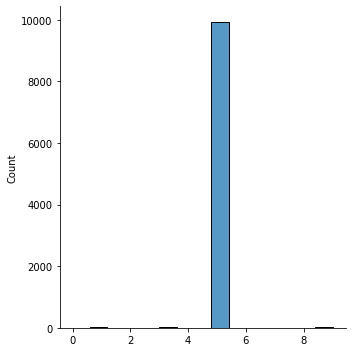

In [10]:
sns.displot(action_selected)

### Close Bandit Envirornment

In [11]:
env.close()